In [1]:
import json
## 修改json路径，注意没有.json后缀
json_path = '/Users/caimogudexiaoxilao/data/myCode/Swin-Transformer-Object-Detection-master/bbox_json/json/cbnet_4conv1fc/CBnet_4conv1fc_modify'

c6da622ace2de7a5f980638a13481626.jpg
300


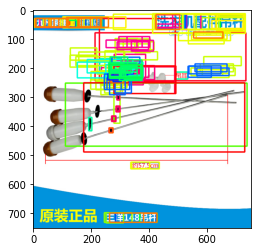

In [2]:
import json
import pickle
import glob
import json
import random
import colorsys
import cv2
import matplotlib.pyplot as plt



class_num = 50
classes = ['冰墩墩', 'Sanyo/三洋', 'Eifini/伊芙丽', 'PSALTER/诗篇', 'Beaster', 'ON/昂跑', 'BYREDO/柏芮朵', 'Ubras', 'Eternelle', 'PERFECT DIARY/完美日记', '花西子', 'Clarins/娇韵诗', "L'occitane/欧舒丹", 'Versace/范思哲', 'Mizuno/美津浓', 'Lining/李宁', 'DOUBLE STAR/双星', 'YONEX/尤尼克斯', 'Tory Burch/汤丽柏琦', 'Gucci/古驰', 'Louis Vuitton/路易威登', 'CARTELO/卡帝乐鳄鱼', 'JORDAN', 'KENZO', 'UNDEFEATED', 'BOY LONDON', 'TREYO/雀友', 'carhartt', '洁柔', 'Blancpain/宝珀', 'GXG', '乐町', 'Diadora/迪亚多纳', 'TUCANO/啄木鸟', 'Loewe', 'Granite Gear', 'DESCENTE/迪桑特', 'OSPREY', 'Swatch/斯沃琪', 'erke/鸿星尔克', 'Massimo Dutti', 'PINKO', 'PALLADIUM', 'origins/悦木之源', 'Trendiano', '音儿', 'Monster Guardians', '敷尔佳', 'IPSA/茵芙莎', 'Schwarzkopf/施华蔻']
hsv_tuples = [(1.0 * x / class_num, 1., 1.) for x in range(50)]
def draw_bbox_new(image_path, bboxes, show_label=False, save_path='./bbox_prediction/', save_name=None):# bboxes: [[[x,y,w,h],class_id], ... ]
    if bboxes == None:
        return
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_h, image_w, _ = image.shape
    hsv_tuples = [(1.0 * x / class_num, 1., 1.) for x in range(class_num)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    random.seed(32)
    random.shuffle(colors)
    random.seed(None)
    for i, bbox in enumerate(bboxes):
        x,y,w,h = bbox[0][:4]
        class_ind = bbox[1]-1
        bbox_color = colors[class_ind]
        bbox_thick = 3
        c1 = (int(x), int(y))
        c2 = (int(x+w), int(y+h))
        cv2.rectangle(image, c1, c2, bbox_color, bbox_thick)
        if show_label:
            bbox_mess = '%s: %.2f' % (classes[class_ind], 1)
            t_size = cv2.getTextSize(bbox_mess, 0, 0.5, thickness=1 )[0]
            cv2.rectangle(image, c1, (c1[0] + t_size[0], c1[1] - t_size[1] - 3), bbox_color, -1)  # filled
            cv2.putText(image, bbox_mess, (c1[0], c1[1] - 2), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0, 0), 1, lineType=cv2.LINE_AA)
    plt.imshow(image)
#     print(1)




fall = json.load(open(json_path+'.json'))
p = 100
val_anns = json.load(open('./dataset/val/annotations/instances_val2017.json','r',encoding="utf-8"))
path2id={image['file_name']:image['id']  for image in val_anns['images']}
id2path={image['id']:image['file_name']  for image in val_anns['images']}


bbox_list=[]
image_ID = 6858
image_path = id2path[image_ID]
print(image_path)
for k in fall:
    if(k['image_id']==image_ID):
#         print(k)
        bbox = [k['bbox'][0], k['bbox'][1], k['bbox'][2], k['bbox'][3]]
        category_id = k['category_id']
        score = k['score']
        bbox_list.append([bbox, category_id])
        
print(len(bbox_list))
draw_bbox_new(image_path='./dataset/val/images/' +image_path, bboxes=bbox_list, save_path='./GT_prediction/',save_name=image_path)


In [3]:
category_list=[{'id': 1, 'name': '冰墩墩'}, {'id': 2, 'name': 'Sanyo/三洋'}, {'id': 3, 'name': 'Eifini/伊芙丽'}, {'id': 4, 'name': 'PSALTER/诗篇'}, {'id': 5, 'name': 'Beaster'}, {'id': 6, 'name': 'ON/昂跑'}, {'id': 7, 'name': 'BYREDO/柏芮朵'}, {'id': 8, 'name': 'Ubras'}, {'id': 9, 'name': 'Eternelle'}, {'id': 10, 'name': 'PERFECT DIARY/完美日记'}, {'id': 11, 'name': '花西子'}, {'id': 12, 'name': 'Clarins/娇韵诗'}, {'id': 13, 'name': "L'occitane/欧舒丹"}, {'id': 14, 'name': 'Versace/范思哲'}, {'id': 15, 'name': 'Mizuno/美津浓'}, {'id': 16, 'name': 'Lining/李宁'}, {'id': 17, 'name': 'DOUBLE STAR/双星'}, {'id': 18, 'name': 'YONEX/尤尼克斯'}, {'id': 19, 'name': 'Tory Burch/汤丽柏琦'}, {'id': 20, 'name': 'Gucci/古驰'}, {'id': 21, 'name': 'Louis Vuitton/路易威登'}, {'id': 22, 'name': 'CARTELO/卡帝乐鳄鱼'}, {'id': 23, 'name': 'JORDAN'}, {'id': 24, 'name': 'KENZO'}, {'id': 25, 'name': 'UNDEFEATED'}, {'id': 26, 'name': 'BOY LONDON'}, {'id': 27, 'name': 'TREYO/雀友'}, {'id': 28, 'name': 'carhartt'}, {'id': 29, 'name': '洁柔'}, {'id': 30, 'name': 'Blancpain/宝珀'}, {'id': 31, 'name': 'GXG'}, {'id': 32, 'name': '乐町'}, {'id': 33, 'name': 'Diadora/迪亚多纳'}, {'id': 34, 'name': 'TUCANO/啄木鸟'}, {'id': 35, 'name': 'Loewe'}, {'id': 36, 'name': 'Granite Gear'}, {'id': 37, 'name': 'DESCENTE/迪桑特'}, {'id': 38, 'name': 'OSPREY'}, {'id': 39, 'name': 'Swatch/斯沃琪'}, {'id': 40, 'name': 'erke/鸿星尔克'}, {'id': 41, 'name': 'Massimo Dutti'}, {'id': 42, 'name': 'PINKO'}, {'id': 43, 'name': 'PALLADIUM'}, {'id': 44, 'name': 'origins/悦木之源'}, {'id': 45, 'name': 'Trendiano'}, {'id': 46, 'name': '音儿'}, {'id': 47, 'name': 'Monster Guardians'}, {'id': 48, 'name': '敷尔佳'}, {'id': 49, 'name': 'IPSA/茵芙莎'}, {'id': 50, 'name': 'Schwarzkopf/施华蔻'}]

categories = {t['id']:t['name'] for t in category_list}

In [4]:
with open(json_path+'.json','r') as f:
    js=json.load(f)
image_preds = [[] for i in range(8000)]
for k in js:
    image_preds[k['image_id']].append(k)

In [5]:
# pid = 0
# MAX = 0
# cat = 1
# plist = []
# for k in js:
#     if k['image_id'] == pid:
# #         print(k['score'], k['category_id'], categories[k['category_id']])
#         if k['score'] > MAX:
#             MAX = k['score']
#             cat = k['category_id']
#     else :
#         plist.append([cat, pid])
#         print(pid, cat, categories[cat], MAX )
#         MAX = k['score']
#         cat = k['category_id']
#         pid = k['image_id']

# print(pid, cat, categories[cat], MAX )
# plist.append([cat,pid])



plist = [[] for i in range(7440)] #每个image中最高score作为图片的类别
for idx in range(7440):
    image_pred = image_preds[idx]
    MAX = 0
    cat = 1
    for pred in image_pred:
        if pred['score'] > MAX:
            MAX = pred['score']
            cat = pred['category_id']
    plist[idx].append([cat,idx, MAX])
    print(idx, cat, categories[cat], MAX )

0 18 YONEX/尤尼克斯 0.9975175239263047
1 18 YONEX/尤尼克斯 0.9958180699675591
2 18 YONEX/尤尼克斯 0.9959761587079075
3 18 YONEX/尤尼克斯 0.9887255366618819
4 18 YONEX/尤尼克斯 0.9941989718240434
5 18 YONEX/尤尼克斯 0.9978215109290975
6 18 YONEX/尤尼克斯 0.9983846573582347
7 18 YONEX/尤尼克斯 0.9957220662283693
8 18 YONEX/尤尼克斯 0.99746169809473
9 18 YONEX/尤尼克斯 0.9964269977513672
10 36 Granite Gear 0.5911488073599253
11 18 YONEX/尤尼克斯 0.9907194398411974
12 18 YONEX/尤尼克斯 0.9963917377627111
13 18 YONEX/尤尼克斯 0.9912938825811549
14 18 YONEX/尤尼克斯 0.9992681838533607
15 18 YONEX/尤尼克斯 0.9949364510288776
16 18 YONEX/尤尼克斯 0.994922084744404
17 18 YONEX/尤尼克斯 0.9966046091397036
18 18 YONEX/尤尼克斯 0.9974100450428778
19 18 YONEX/尤尼克斯 0.9933673070197557
20 18 YONEX/尤尼克斯 0.9963464332971512
21 18 YONEX/尤尼克斯 0.9960833097300705
22 18 YONEX/尤尼克斯 0.9270561145579805
23 18 YONEX/尤尼克斯 0.9975660771989343
24 18 YONEX/尤尼克斯 0.9959639086188647
25 18 YONEX/尤尼克斯 0.9940884229669634
26 18 YONEX/尤尼克斯 0.9981199242904039
27 18 YONEX/尤尼克斯 0.9994464807697944
28 

614 21 Louis Vuitton/路易威登 0.9846425015088671
615 21 Louis Vuitton/路易威登 0.9994885960394234
616 21 Louis Vuitton/路易威登 0.7252628418120347
617 21 Louis Vuitton/路易威登 0.7045643790121489
618 21 Louis Vuitton/路易威登 0.534949418857572
619 21 Louis Vuitton/路易威登 0.999833148422234
620 21 Louis Vuitton/路易威登 0.9998090953276901
621 21 Louis Vuitton/路易威登 0.9992660974634994
622 21 Louis Vuitton/路易威登 0.9998112711342597
623 21 Louis Vuitton/路易威登 0.9995716343559036
624 21 Louis Vuitton/路易威登 0.9939020487412096
625 21 Louis Vuitton/路易威登 0.9997889169571743
626 21 Louis Vuitton/路易威登 0.998892246205922
627 21 Louis Vuitton/路易威登 0.9996586070075508
628 17 DOUBLE STAR/双星 0.9998633712696536
629 17 DOUBLE STAR/双星 0.999937229470744
630 17 DOUBLE STAR/双星 0.9999403292499665
631 17 DOUBLE STAR/双星 0.9998004219069809
632 17 DOUBLE STAR/双星 0.9998924018942953
633 17 DOUBLE STAR/双星 0.7751244299125588
634 17 DOUBLE STAR/双星 0.9998600926570145
635 17 DOUBLE STAR/双星 0.9998791384158913
636 17 DOUBLE STAR/双星 0.9999043837332131
637 1

1239 11 花西子 0.9829922267397095
1240 14 Versace/范思哲 0.5900762390405798
1241 11 花西子 0.9998694516058209
1242 11 花西子 0.9998904943378506
1243 11 花西子 0.9734706587463562
1244 11 花西子 0.607622315787873
1245 11 花西子 0.9982355698998593
1246 11 花西子 0.999828409336692
1247 11 花西子 0.9990145682629337
1248 11 花西子 0.9998694516058209
1249 11 花西子 0.9998714485789739
1250 11 花西子 0.9992197498030089
1251 11 花西子 0.9998003026847031
1252 11 花西子 0.8317157281218783
1253 11 花西子 0.8543152944606054
1254 11 花西子 0.9992158154678419
1255 11 花西子 0.9998466801507632
1256 11 花西子 0.999789423651855
1257 11 花西子 0.999836814507276
1258 11 花西子 0.996166497074398
1259 11 花西子 0.9998764857202105
1260 11 花西子 0.9975188055657909
1261 11 花西子 0.999823551028872
1262 11 花西子 0.9998168745813159
1263 11 花西子 0.999839407591818
1264 11 花西子 0.9698836180745136
1265 11 花西子 0.9998960977849067
1266 11 花西子 0.9998188715544688
1267 11 花西子 0.9998257864465806
1268 11 花西子 0.9928207324872312
1269 11 花西子 0.9993554843662718
1270 11 花西子 0.9916903860715123
1271 11

1864 6 ON/昂跑 0.9902291382237893
1865 6 ON/昂跑 0.9995451073990955
1866 6 ON/昂跑 0.9941902984033342
1867 6 ON/昂跑 0.9876364113487086
1868 6 ON/昂跑 0.9998256970298722
1869 6 ON/昂跑 0.9996482346693831
1870 6 ON/昂跑 0.9877468707890802
1871 6 ON/昂跑 0.9997584556651992
1872 6 ON/昂跑 0.9996080567617681
1873 6 ON/昂跑 0.9996226912963668
1874 6 ON/昂跑 0.999537745423442
1875 6 ON/昂跑 0.9996060299830457
1876 6 ON/昂跑 0.9996600376748842
1877 6 ON/昂跑 0.9985639080528907
1878 6 ON/昂跑 0.9998059061317592
1879 6 ON/昂跑 0.9995671039093476
1880 6 ON/昂跑 0.9989764171340412
1881 6 ON/昂跑 0.9995873716965717
1882 6 ON/昂跑 0.9997584556651992
1883 6 ON/昂跑 0.9993990899143732
1884 6 ON/昂跑 0.8746813506472302
1885 6 ON/昂跑 0.9987291501299065
1886 6 ON/昂跑 0.9993990899143732
1887 6 ON/昂跑 0.9998357713123454
1888 6 ON/昂跑 0.9998468291786105
1889 6 ON/昂跑 0.9994401917946409
1890 6 ON/昂跑 0.9996979503592212
1891 6 ON/昂跑 0.9997171451459452
1892 6 ON/昂跑 0.9993863629362192
1893 6 ON/昂跑 0.9997023019723605
1894 6 ON/昂跑 0.9996946419410125
1895 11 花

2489 43 PALLADIUM 0.9991718522529071
2490 43 PALLADIUM 0.9978002297525121
2491 43 PALLADIUM 0.9986881972774859
2492 43 PALLADIUM 0.9991222259797773
2493 43 PALLADIUM 0.995632351464333
2494 43 PALLADIUM 0.9940083354018585
2495 43 PALLADIUM 0.9990951029115802
2496 43 PALLADIUM 0.9991624634985312
2497 43 PALLADIUM 0.9989258668882586
2498 43 PALLADIUM 0.9942813544179957
2499 43 PALLADIUM 0.9989555532354281
2500 43 PALLADIUM 0.9982203988650107
2501 43 PALLADIUM 0.9990583526444518
2502 43 PALLADIUM 0.9991254151757082
2503 43 PALLADIUM 0.9946291556078761
2504 43 PALLADIUM 0.8784682376622168
2505 43 PALLADIUM 0.9987640822572987
2506 43 PALLADIUM 0.9987899236860095
2507 43 PALLADIUM 0.9988134998914423
2508 43 PALLADIUM 0.998008451460671
2509 43 PALLADIUM 0.9922524893057187
2510 43 PALLADIUM 0.999159125274753
2511 43 PALLADIUM 0.9967120284119917
2512 43 PALLADIUM 0.9955527407883393
2513 43 PALLADIUM 0.9987664667028544
2514 43 PALLADIUM 0.9962022339521652
2515 43 PALLADIUM 0.9860005624751635
2516

3189 38 OSPREY 0.9975248560963887
3190 38 OSPREY 0.98443904869182
3191 38 OSPREY 0.9979038041063415
3192 38 OSPREY 0.9985140731407748
3193 38 OSPREY 0.9983193831611451
3194 38 OSPREY 0.9985370830403881
3195 38 OSPREY 0.9920308848968781
3196 38 OSPREY 0.9965703029292698
3197 38 OSPREY 0.9974272428564488
3198 38 OSPREY 0.998840801793056
3199 38 OSPREY 0.9984616153385476
3200 38 OSPREY 0.9983269239702153
3201 38 OSPREY 0.9978407057158216
3202 38 OSPREY 0.9986643826274975
3203 38 OSPREY 0.9980569153165924
3204 38 OSPREY 0.9978953393246185
3205 38 OSPREY 0.9964388305624379
3206 38 OSPREY 0.9973881975604728
3207 38 OSPREY 0.9982161962797186
3208 38 OSPREY 0.9987203574869195
3209 38 OSPREY 0.9986960659478199
3210 38 OSPREY 0.995394264575588
3211 38 OSPREY 0.9996830475744976
3212 28 carhartt 0.7188575504238884
3213 38 OSPREY 0.9908321048937081
3214 38 OSPREY 0.9986551130953993
3215 38 OSPREY 0.9988931701785748
3216 38 OSPREY 0.9984131216770569
3217 38 OSPREY 0.9981867483771047
3218 38 OSPREY 0

3864 43 PALLADIUM 0.894774656067843
3865 43 PALLADIUM 0.9963252713428437
3866 43 PALLADIUM 0.9976576101027069
3867 43 PALLADIUM 0.9980938742227069
3868 43 PALLADIUM 0.9990184131813924
3869 43 PALLADIUM 0.9993529210872993
3870 43 PALLADIUM 0.9987853932394535
3871 43 PALLADIUM 0.9659307736488446
3872 43 PALLADIUM 0.9874516764292742
3873 43 PALLADIUM 0.9981554823347545
3874 43 PALLADIUM 0.9982708000829461
3875 43 PALLADIUM 0.9979128351938841
3876 43 PALLADIUM 0.9980156942140467
3877 43 PALLADIUM 0.9981969120762861
3878 43 PALLADIUM 0.9890570938164136
3879 43 PALLADIUM 0.9984305281296141
3880 43 PALLADIUM 0.9973948740080291
3881 37 DESCENTE/迪桑特 0.5260903765132853
3882 43 PALLADIUM 0.9993764674871627
3883 43 PALLADIUM 0.9714879326555835
3884 43 PALLADIUM 0.9878785219893289
3885 43 PALLADIUM 0.9987929936596626
3886 43 PALLADIUM 0.9989740922996243
3887 43 PALLADIUM 0.9955136656867939
3888 43 PALLADIUM 0.9987844394612312
3889 43 PALLADIUM 0.9987649466188127
3890 43 PALLADIUM 0.998042101948577


4613 24 KENZO 0.9999238169644927
4614 24 KENZO 0.9667243171298092
4615 24 KENZO 0.9973382732316487
4616 27 TREYO/雀友 0.5637626379499877
4617 24 KENZO 0.9594785235860341
4618 24 KENZO 0.9978025843924985
4619 24 KENZO 0.995513069575405
4620 24 KENZO 0.9686067474793918
4621 24 KENZO 0.9892807250039766
4622 24 KENZO 0.826214514168992
4623 24 KENZO 0.9036437801459953
4624 24 KENZO 0.9820076295585878
4625 24 KENZO 0.9613761547760348
4626 24 KENZO 0.9786272010941539
4627 24 KENZO 0.9861235998658419
4628 24 KENZO 0.9965306317163354
4629 24 KENZO 0.9828219177158878
4630 24 KENZO 0.9967503285687314
4631 14 Versace/范思哲 0.5926322230999245
4632 24 KENZO 0.9136764242386615
4633 24 KENZO 0.965397253955738
4634 24 KENZO 0.9258271713185298
4635 24 KENZO 0.9970218275008268
4636 24 KENZO 0.996680196063822
4637 24 KENZO 0.9989596664040118
4638 24 KENZO 0.9873917672346852
4639 24 KENZO 0.9978845795140481
4640 24 KENZO 0.9728474242892133
4641 24 KENZO 0.8265785295886517
4642 24 KENZO 0.9809113211031776
4643 

5332 25 UNDEFEATED 0.9994002523315817
5333 25 UNDEFEATED 0.9998732071075712
5334 25 UNDEFEATED 0.6920313904069038
5335 25 UNDEFEATED 0.9996848359086643
5336 25 UNDEFEATED 0.5564482990478763
5337 25 UNDEFEATED 0.5926425954380922
5338 25 UNDEFEATED 0.9975112945622902
5339 25 UNDEFEATED 0.9965922994395219
5340 25 UNDEFEATED 0.9998459648170964
5341 25 UNDEFEATED 0.7955679507741773
5342 47 Monster Guardians 0.5679175268795476
5343 5 Beaster 0.9998140728577878
5344 5 Beaster 0.9998007795738143
5345 5 Beaster 0.6324178521639833
5346 5 Beaster 0.9997645360013664
5347 5 Beaster 0.999946022113731
5348 37 DESCENTE/迪桑特 0.5057433176514868
5349 5 Beaster 0.9997695433370335
5350 5 Beaster 0.9998434015381239
5351 5 Beaster 0.9998059061317592
5352 5 Beaster 0.9997972625166196
5353 6 ON/昂跑 0.7125719582026425
5354 5 Beaster 0.9999434290291891
5355 5 Beaster 0.9994137542545413
5356 5 Beaster 0.999688144326873
5357 5 Beaster 0.9999409551669249
5358 5 Beaster 0.9999149349047974
5359 5 Beaster 0.999943667473

5988 44 origins/悦木之源 0.9999370506373273
5989 44 origins/悦木之源 0.9998807777222108
5990 44 origins/悦木之源 0.9999271551882708
5991 44 origins/悦木之源 0.9995643617969584
5992 44 origins/悦木之源 0.9999307020510351
5993 44 origins/悦木之源 0.9997767562848399
5994 44 origins/悦木之源 0.9998508231249164
5995 44 origins/悦木之源 0.9995576853494021
5996 44 origins/悦木之源 0.999928705077882
5997 26 BOY LONDON 0.5168243074497783
5998 44 origins/悦木之源 0.9999290925502848
5999 44 origins/悦木之源 0.9996195021004359
6000 44 origins/悦木之源 0.9998045946867036
6001 44 origins/悦木之源 0.99964462819548
6002 44 origins/悦木之源 0.9999173491559227
6003 44 origins/悦木之源 0.9999514169218009
6004 44 origins/悦木之源 0.9998589600453754
6005 44 origins/悦木之源 0.9996282053267145
6006 44 origins/悦木之源 0.9998414343705404
6007 44 origins/悦木之源 0.9998169043868853
6008 44 origins/悦木之源 0.99992936080041
6009 44 origins/悦木之源 0.9999177366283255
6010 44 origins/悦木之源 0.9997869497895908
6011 44 origins/悦木之源 0.9986463204524124
6012 44 origins/悦木之源 0.9998634010752231
6013 44

6738 29 洁柔 0.9962047078144294
6739 29 洁柔 0.9978718823414635
6740 29 洁柔 0.996707855632269
6741 29 洁柔 0.9870940095959068
6742 29 洁柔 0.9969569705817095
6743 29 洁柔 0.9882265616237649
6744 29 洁柔 0.9953357264371936
6745 29 洁柔 0.9984669803410481
6746 29 洁柔 0.9976447042911363
6747 29 洁柔 0.999238944589733
6748 29 洁柔 0.9990578757553406
6749 29 洁柔 0.9970761332483598
6750 29 洁柔 0.9989372526157874
6751 29 洁柔 0.9982176865581909
6752 29 洁柔 0.9983809316620538
6753 29 洁柔 0.9978997505488967
6754 29 洁柔 0.996750030513037
6755 29 洁柔 0.9991768297830048
6756 29 洁柔 0.9968975978873704
6757 29 洁柔 0.999263742823513
6758 29 洁柔 0.9984902882963559
6759 29 洁柔 0.929908567165225
6760 29 洁柔 0.9984111843150427
6761 29 洁柔 0.9982376562897206
6762 29 洁柔 0.99659077935548
6763 29 洁柔 0.9964406785077435
6764 29 洁柔 0.9946986025846883
6765 29 洁柔 0.9990740005684116
6766 29 洁柔 0.9988293862599578
6767 14 Versace/范思哲 0.9905685640486551
6768 14 Versace/范思哲 0.7176655511877676
6769 26 BOY LONDON 0.8595431019249516
6770 14 Versace/范思哲 0

In [6]:
length_p = 7440

In [7]:
image_preds[7242]

[{'image_id': 7242,
  'bbox': [1308.3931884765625,
   639.1724853515625,
   20.9705810546875,
   22.965087890625],
  'score': 0.5000375252628714,
  'category_id': 1},
 {'image_id': 7242,
  'bbox': [1803.727294921875,
   2.9898719787597656,
   809.78173828125,
   90.29935836791992],
  'score': 0.5004206399327998,
  'category_id': 3},
 {'image_id': 7242,
  'bbox': [1929.790771484375,
   0.10780973732471466,
   696.317626953125,
   161.31366853415966],
  'score': 0.5003916227264859,
  'category_id': 3},
 {'image_id': 7242,
  'bbox': [1574.52392578125,
   0.07018397748470306,
   849.849609375,
   130.49162937700748],
  'score': 0.5001751983014913,
  'category_id': 3},
 {'image_id': 7242,
  'bbox': [1759.258056640625,
   0.18807297945022583,
   716.691162109375,
   58.28793257474899],
  'score': 0.5001453698102803,
  'category_id': 3},
 {'image_id': 7242,
  'bbox': [2097.18603515625,
   0.06829895079135895,
   188.576904296875,
   9.742570266127586],
  'score': 0.5001258665621088,
  'catego

In [8]:
newjson = []#过滤每一张图片中与最高分数对应种类不一致的预测
for idx in range(length_p):
    image_pred = image_preds[idx]
    MAX = 0
    cat = 1
    new_image_pred = []
    for pred in image_pred:
        if pred['category_id'] == plist[idx][0][0]:
            newjson.append(pred)
            
    
    print(idx,plist[idx][0][0], categories[plist[idx][0][0]])

0 18 YONEX/尤尼克斯
1 18 YONEX/尤尼克斯
2 18 YONEX/尤尼克斯
3 18 YONEX/尤尼克斯
4 18 YONEX/尤尼克斯
5 18 YONEX/尤尼克斯
6 18 YONEX/尤尼克斯
7 18 YONEX/尤尼克斯
8 18 YONEX/尤尼克斯
9 18 YONEX/尤尼克斯
10 36 Granite Gear
11 18 YONEX/尤尼克斯
12 18 YONEX/尤尼克斯
13 18 YONEX/尤尼克斯
14 18 YONEX/尤尼克斯
15 18 YONEX/尤尼克斯
16 18 YONEX/尤尼克斯
17 18 YONEX/尤尼克斯
18 18 YONEX/尤尼克斯
19 18 YONEX/尤尼克斯
20 18 YONEX/尤尼克斯
21 18 YONEX/尤尼克斯
22 18 YONEX/尤尼克斯
23 18 YONEX/尤尼克斯
24 18 YONEX/尤尼克斯
25 18 YONEX/尤尼克斯
26 18 YONEX/尤尼克斯
27 18 YONEX/尤尼克斯
28 18 YONEX/尤尼克斯
29 18 YONEX/尤尼克斯
30 20 Gucci/古驰
31 20 Gucci/古驰
32 20 Gucci/古驰
33 20 Gucci/古驰
34 12 Clarins/娇韵诗
35 20 Gucci/古驰
36 20 Gucci/古驰
37 20 Gucci/古驰
38 20 Gucci/古驰
39 20 Gucci/古驰
40 14 Versace/范思哲
41 20 Gucci/古驰
42 20 Gucci/古驰
43 20 Gucci/古驰
44 20 Gucci/古驰
45 20 Gucci/古驰
46 20 Gucci/古驰
47 20 Gucci/古驰
48 20 Gucci/古驰
49 20 Gucci/古驰
50 42 PINKO
51 20 Gucci/古驰
52 16 Lining/李宁
53 16 Lining/李宁
54 25 UNDEFEATED
55 16 Lining/李宁
56 16 Lining/李宁
57 25 UNDEFEATED
58 16 Lining/李宁
59 16 Lining/李宁
60 16 Lining/李宁
61 16 Lining/李宁
62 

724 17 DOUBLE STAR/双星
725 17 DOUBLE STAR/双星
726 17 DOUBLE STAR/双星
727 17 DOUBLE STAR/双星
728 43 PALLADIUM
729 48 敷尔佳
730 17 DOUBLE STAR/双星
731 17 DOUBLE STAR/双星
732 17 DOUBLE STAR/双星
733 17 DOUBLE STAR/双星
734 17 DOUBLE STAR/双星
735 17 DOUBLE STAR/双星
736 17 DOUBLE STAR/双星
737 17 DOUBLE STAR/双星
738 17 DOUBLE STAR/双星
739 17 DOUBLE STAR/双星
740 39 Swatch/斯沃琪
741 20 Gucci/古驰
742 17 DOUBLE STAR/双星
743 17 DOUBLE STAR/双星
744 17 DOUBLE STAR/双星
745 17 DOUBLE STAR/双星
746 17 DOUBLE STAR/双星
747 25 UNDEFEATED
748 21 Louis Vuitton/路易威登
749 21 Louis Vuitton/路易威登
750 21 Louis Vuitton/路易威登
751 21 Louis Vuitton/路易威登
752 21 Louis Vuitton/路易威登
753 21 Louis Vuitton/路易威登
754 21 Louis Vuitton/路易威登
755 21 Louis Vuitton/路易威登
756 21 Louis Vuitton/路易威登
757 21 Louis Vuitton/路易威登
758 21 Louis Vuitton/路易威登
759 21 Louis Vuitton/路易威登
760 21 Louis Vuitton/路易威登
761 21 Louis Vuitton/路易威登
762 21 Louis Vuitton/路易威登
763 21 Louis Vuitton/路易威登
764 21 Louis Vuitton/路易威登
765 21 Louis Vuitton/路易威登
766 21 Louis Vuitton/路易威登
767 21 L

1557 48 敷尔佳
1558 48 敷尔佳
1559 48 敷尔佳
1560 48 敷尔佳
1561 48 敷尔佳
1562 48 敷尔佳
1563 48 敷尔佳
1564 48 敷尔佳
1565 12 Clarins/娇韵诗
1566 12 Clarins/娇韵诗
1567 12 Clarins/娇韵诗
1568 12 Clarins/娇韵诗
1569 12 Clarins/娇韵诗
1570 12 Clarins/娇韵诗
1571 12 Clarins/娇韵诗
1572 12 Clarins/娇韵诗
1573 12 Clarins/娇韵诗
1574 12 Clarins/娇韵诗
1575 12 Clarins/娇韵诗
1576 12 Clarins/娇韵诗
1577 12 Clarins/娇韵诗
1578 12 Clarins/娇韵诗
1579 12 Clarins/娇韵诗
1580 12 Clarins/娇韵诗
1581 12 Clarins/娇韵诗
1582 12 Clarins/娇韵诗
1583 12 Clarins/娇韵诗
1584 12 Clarins/娇韵诗
1585 12 Clarins/娇韵诗
1586 12 Clarins/娇韵诗
1587 12 Clarins/娇韵诗
1588 12 Clarins/娇韵诗
1589 12 Clarins/娇韵诗
1590 12 Clarins/娇韵诗
1591 12 Clarins/娇韵诗
1592 12 Clarins/娇韵诗
1593 12 Clarins/娇韵诗
1594 12 Clarins/娇韵诗
1595 12 Clarins/娇韵诗
1596 12 Clarins/娇韵诗
1597 12 Clarins/娇韵诗
1598 12 Clarins/娇韵诗
1599 12 Clarins/娇韵诗
1600 12 Clarins/娇韵诗
1601 12 Clarins/娇韵诗
1602 12 Clarins/娇韵诗
1603 12 Clarins/娇韵诗
1604 12 Clarins/娇韵诗
1605 12 Clarins/娇韵诗
1606 12 Clarins/娇韵诗
1607 17 DOUBLE STAR/双星
1608 12 Clarins/娇韵诗
1609 12 Clarins/娇韵诗
1

2391 9 Eternelle
2392 9 Eternelle
2393 9 Eternelle
2394 9 Eternelle
2395 9 Eternelle
2396 9 Eternelle
2397 9 Eternelle
2398 9 Eternelle
2399 9 Eternelle
2400 9 Eternelle
2401 9 Eternelle
2402 9 Eternelle
2403 9 Eternelle
2404 9 Eternelle
2405 9 Eternelle
2406 9 Eternelle
2407 9 Eternelle
2408 9 Eternelle
2409 9 Eternelle
2410 9 Eternelle
2411 9 Eternelle
2412 9 Eternelle
2413 9 Eternelle
2414 9 Eternelle
2415 9 Eternelle
2416 9 Eternelle
2417 9 Eternelle
2418 9 Eternelle
2419 9 Eternelle
2420 9 Eternelle
2421 9 Eternelle
2422 9 Eternelle
2423 9 Eternelle
2424 9 Eternelle
2425 9 Eternelle
2426 9 Eternelle
2427 9 Eternelle
2428 9 Eternelle
2429 9 Eternelle
2430 9 Eternelle
2431 9 Eternelle
2432 9 Eternelle
2433 9 Eternelle
2434 9 Eternelle
2435 9 Eternelle
2436 9 Eternelle
2437 9 Eternelle
2438 9 Eternelle
2439 9 Eternelle
2440 9 Eternelle
2441 16 Lining/李宁
2442 9 Eternelle
2443 9 Eternelle
2444 9 Eternelle
2445 9 Eternelle
2446 9 Eternelle
2447 9 Eternelle
2448 9 Eternelle
2449 9 Eterne

3224 6 ON/昂跑
3225 38 OSPREY
3226 38 OSPREY
3227 38 OSPREY
3228 38 OSPREY
3229 38 OSPREY
3230 38 OSPREY
3231 38 OSPREY
3232 38 OSPREY
3233 38 OSPREY
3234 38 OSPREY
3235 38 OSPREY
3236 38 OSPREY
3237 38 OSPREY
3238 38 OSPREY
3239 38 OSPREY
3240 38 OSPREY
3241 38 OSPREY
3242 38 OSPREY
3243 38 OSPREY
3244 38 OSPREY
3245 38 OSPREY
3246 38 OSPREY
3247 38 OSPREY
3248 32 乐町
3249 32 乐町
3250 32 乐町
3251 32 乐町
3252 32 乐町
3253 32 乐町
3254 32 乐町
3255 32 乐町
3256 32 乐町
3257 32 乐町
3258 32 乐町
3259 32 乐町
3260 32 乐町
3261 32 乐町
3262 32 乐町
3263 32 乐町
3264 32 乐町
3265 32 乐町
3266 32 乐町
3267 32 乐町
3268 32 乐町
3269 32 乐町
3270 4 PSALTER/诗篇
3271 32 乐町
3272 32 乐町
3273 32 乐町
3274 32 乐町
3275 32 乐町
3276 34 TUCANO/啄木鸟
3277 34 TUCANO/啄木鸟
3278 34 TUCANO/啄木鸟
3279 34 TUCANO/啄木鸟
3280 34 TUCANO/啄木鸟
3281 34 TUCANO/啄木鸟
3282 34 TUCANO/啄木鸟
3283 34 TUCANO/啄木鸟
3284 34 TUCANO/啄木鸟
3285 34 TUCANO/啄木鸟
3286 34 TUCANO/啄木鸟
3287 34 TUCANO/啄木鸟
3288 34 TUCANO/啄木鸟
3289 34 TUCANO/啄木鸟
3290 34 TUCANO/啄木鸟
3291 34 TUCANO/啄木鸟
3292 34 TUCANO/啄木鸟
3293

4057 30 Blancpain/宝珀
4058 30 Blancpain/宝珀
4059 30 Blancpain/宝珀
4060 30 Blancpain/宝珀
4061 30 Blancpain/宝珀
4062 30 Blancpain/宝珀
4063 30 Blancpain/宝珀
4064 30 Blancpain/宝珀
4065 30 Blancpain/宝珀
4066 30 Blancpain/宝珀
4067 30 Blancpain/宝珀
4068 30 Blancpain/宝珀
4069 30 Blancpain/宝珀
4070 30 Blancpain/宝珀
4071 30 Blancpain/宝珀
4072 30 Blancpain/宝珀
4073 30 Blancpain/宝珀
4074 30 Blancpain/宝珀
4075 30 Blancpain/宝珀
4076 30 Blancpain/宝珀
4077 30 Blancpain/宝珀
4078 23 JORDAN
4079 23 JORDAN
4080 23 JORDAN
4081 23 JORDAN
4082 23 JORDAN
4083 23 JORDAN
4084 23 JORDAN
4085 23 JORDAN
4086 37 DESCENTE/迪桑特
4087 23 JORDAN
4088 23 JORDAN
4089 10 PERFECT DIARY/完美日记
4090 23 JORDAN
4091 23 JORDAN
4092 23 JORDAN
4093 23 JORDAN
4094 23 JORDAN
4095 23 JORDAN
4096 23 JORDAN
4097 23 JORDAN
4098 23 JORDAN
4099 23 JORDAN
4100 23 JORDAN
4101 23 JORDAN
4102 23 JORDAN
4103 23 JORDAN
4104 23 JORDAN
4105 30 Blancpain/宝珀
4106 30 Blancpain/宝珀
4107 30 Blancpain/宝珀
4108 30 Blancpain/宝珀
4109 30 Blancpain/宝珀
4110 30 Blancpain/宝珀
4111 30 Bl

4890 46 音儿
4891 46 音儿
4892 46 音儿
4893 46 音儿
4894 46 音儿
4895 46 音儿
4896 46 音儿
4897 46 音儿
4898 46 音儿
4899 46 音儿
4900 46 音儿
4901 46 音儿
4902 46 音儿
4903 46 音儿
4904 13 L'occitane/欧舒丹
4905 46 音儿
4906 46 音儿
4907 46 音儿
4908 46 音儿
4909 46 音儿
4910 46 音儿
4911 46 音儿
4912 46 音儿
4913 46 音儿
4914 46 音儿
4915 46 音儿
4916 46 音儿
4917 46 音儿
4918 46 音儿
4919 46 音儿
4920 46 音儿
4921 46 音儿
4922 46 音儿
4923 46 音儿
4924 46 音儿
4925 46 音儿
4926 46 音儿
4927 46 音儿
4928 46 音儿
4929 46 音儿
4930 46 音儿
4931 46 音儿
4932 46 音儿
4933 46 音儿
4934 35 Loewe
4935 46 音儿
4936 46 音儿
4937 46 音儿
4938 46 音儿
4939 46 音儿
4940 46 音儿
4941 46 音儿
4942 46 音儿
4943 46 音儿
4944 46 音儿
4945 42 PINKO
4946 46 音儿
4947 46 音儿
4948 46 音儿
4949 46 音儿
4950 46 音儿
4951 45 Trendiano
4952 37 DESCENTE/迪桑特
4953 46 音儿
4954 46 音儿
4955 37 DESCENTE/迪桑特
4956 46 音儿
4957 46 音儿
4958 46 音儿
4959 46 音儿
4960 46 音儿
4961 46 音儿
4962 46 音儿
4963 46 音儿
4964 46 音儿
4965 46 音儿
4966 46 音儿
4967 45 Trendiano
4968 45 Trendiano
4969 45 Trendiano
4970 45 Trendiano
4971 45 Trendiano
4972 45 Trendiano


5723 49 IPSA/茵芙莎
5724 49 IPSA/茵芙莎
5725 49 IPSA/茵芙莎
5726 49 IPSA/茵芙莎
5727 49 IPSA/茵芙莎
5728 49 IPSA/茵芙莎
5729 49 IPSA/茵芙莎
5730 49 IPSA/茵芙莎
5731 49 IPSA/茵芙莎
5732 49 IPSA/茵芙莎
5733 49 IPSA/茵芙莎
5734 49 IPSA/茵芙莎
5735 49 IPSA/茵芙莎
5736 49 IPSA/茵芙莎
5737 49 IPSA/茵芙莎
5738 49 IPSA/茵芙莎
5739 49 IPSA/茵芙莎
5740 49 IPSA/茵芙莎
5741 40 erke/鸿星尔克
5742 24 KENZO
5743 40 erke/鸿星尔克
5744 40 erke/鸿星尔克
5745 11 花西子
5746 40 erke/鸿星尔克
5747 40 erke/鸿星尔克
5748 40 erke/鸿星尔克
5749 40 erke/鸿星尔克
5750 40 erke/鸿星尔克
5751 40 erke/鸿星尔克
5752 40 erke/鸿星尔克
5753 40 erke/鸿星尔克
5754 40 erke/鸿星尔克
5755 40 erke/鸿星尔克
5756 40 erke/鸿星尔克
5757 40 erke/鸿星尔克
5758 40 erke/鸿星尔克
5759 40 erke/鸿星尔克
5760 40 erke/鸿星尔克
5761 40 erke/鸿星尔克
5762 40 erke/鸿星尔克
5763 40 erke/鸿星尔克
5764 40 erke/鸿星尔克
5765 40 erke/鸿星尔克
5766 40 erke/鸿星尔克
5767 40 erke/鸿星尔克
5768 40 erke/鸿星尔克
5769 40 erke/鸿星尔克
5770 40 erke/鸿星尔克
5771 40 erke/鸿星尔克
5772 40 erke/鸿星尔克
5773 40 erke/鸿星尔克
5774 40 erke/鸿星尔克
5775 40 erke/鸿星尔克
5776 40 erke/鸿星尔克
5777 40 erke/鸿星尔克
5778 49 IPSA/茵芙莎
5779 49 IPSA/茵芙莎
5780

6692 17 DOUBLE STAR/双星
6693 17 DOUBLE STAR/双星
6694 17 DOUBLE STAR/双星
6695 27 TREYO/雀友
6696 40 erke/鸿星尔克
6697 17 DOUBLE STAR/双星
6698 17 DOUBLE STAR/双星
6699 17 DOUBLE STAR/双星
6700 17 DOUBLE STAR/双星
6701 17 DOUBLE STAR/双星
6702 17 DOUBLE STAR/双星
6703 17 DOUBLE STAR/双星
6704 43 PALLADIUM
6705 17 DOUBLE STAR/双星
6706 17 DOUBLE STAR/双星
6707 17 DOUBLE STAR/双星
6708 17 DOUBLE STAR/双星
6709 17 DOUBLE STAR/双星
6710 48 敷尔佳
6711 17 DOUBLE STAR/双星
6712 17 DOUBLE STAR/双星
6713 17 DOUBLE STAR/双星
6714 17 DOUBLE STAR/双星
6715 17 DOUBLE STAR/双星
6716 17 DOUBLE STAR/双星
6717 17 DOUBLE STAR/双星
6718 17 DOUBLE STAR/双星
6719 17 DOUBLE STAR/双星
6720 17 DOUBLE STAR/双星
6721 20 Gucci/古驰
6722 20 Gucci/古驰
6723 20 Gucci/古驰
6724 20 Gucci/古驰
6725 20 Gucci/古驰
6726 20 Gucci/古驰
6727 20 Gucci/古驰
6728 20 Gucci/古驰
6729 20 Gucci/古驰
6730 28 carhartt
6731 28 carhartt
6732 29 洁柔
6733 29 洁柔
6734 29 洁柔
6735 29 洁柔
6736 29 洁柔
6737 29 洁柔
6738 29 洁柔
6739 29 洁柔
6740 29 洁柔
6741 29 洁柔
6742 29 洁柔
6743 29 洁柔
6744 29 洁柔
6745 29 洁柔
6746 29 洁柔
6747 29 

In [9]:
newjson

[{'image_id': 0,
  'bbox': [330.206787109375,
   521.6700439453125,
   30.37371826171875,
   29.36083984375],
  'score': 0.9975175239263047,
  'category_id': 18},
 {'image_id': 0,
  'bbox': [432.1812438964844,
   551.9354248046875,
   154.09927368164062,
   35.5648193359375],
  'score': 0.9917984014551893,
  'category_id': 18},
 {'image_id': 0,
  'bbox': [561.2877197265625,
   285.228271484375,
   14.92529296875,
   16.46246337890625],
  'score': 0.981846321816739,
  'category_id': 18},
 {'image_id': 0,
  'bbox': [435.69293212890625,
   554.523193359375,
   146.20953369140625,
   30.19091796875],
  'score': 0.586455316887668,
  'category_id': 18},
 {'image_id': 0,
  'bbox': [429.09735107421875,
   547.9490966796875,
   161.09259033203125,
   44.22869873046875],
  'score': 0.5268987855220117,
  'category_id': 18},
 {'image_id': 0,
  'bbox': [561.0704345703125,
   284.9880676269531,
   15.35809326171875,
   17.115020751953125],
  'score': 0.521434776371188,
  'category_id': 18},
 {'image

In [10]:
with open(json_path+'_maxval_filter.json', 'w') as output:
    json.dump(newjson,output)

In [11]:
####上面是利用最大值直接过滤标签，下面是额外使用相邻两个进行修正

In [12]:
image_preds[0]

[{'image_id': 0,
  'bbox': [590.0300903320312,
   4.133234977722168,
   8.54150390625,
   48.29596424102783],
  'score': 0.5001305744303919,
  'category_id': 1},
 {'image_id': 0,
  'bbox': [543.04345703125,
   2.5539302825927734,
   55.6131591796875,
   51.12005043029785],
  'score': 0.5213182608116743,
  'category_id': 2},
 {'image_id': 0,
  'bbox': [546.42626953125,
   2.9798991680145264,
   52.12457275390625,
   50.00972104072571],
  'score': 0.500557533595073,
  'category_id': 2},
 {'image_id': 0,
  'bbox': [476.05450439453125,
   0.6303005218505859,
   122.1578369140625,
   52.25103569030762],
  'score': 0.5004448708711224,
  'category_id': 2},
 {'image_id': 0,
  'bbox': [544.1820068359375,
   6.21199369430542,
   12.9652099609375,
   46.877357959747314],
  'score': 0.5003340372602476,
  'category_id': 2},
 {'image_id': 0,
  'bbox': [23.542369842529297,
   1.8697092533111572,
   150.43010330200195,
   27.76209807395935],
  'score': 0.5008152240492699,
  'category_id': 3},
 {'image

In [13]:
#根据前后进行过滤
# print(len(plist))
# cnt = 0
# for i in range(1, 7410):
#     if plist[i][0][0] != plist[i-1][0][0] and plist[i-1][0][0] == plist[i+1][0][0]:
# #         print(plist[i],i)
#         cnt += 1
#         new_image_pred = []
#         for image_pred in image_preds[plist[i][0][1]]:
#             if image_pred['category_id'] == plist[i-1][0][0]:
#                 new_image_pred.append(image_pred)
#         
#         image_preds[plist[i][0][1]] = new_image_pred
# print(f'{cnt} missing')



#根据前后进行过滤 那些没有前后标签会被预测称0.5 冰墩墩的保持原状
print(len(plist))
cnt = 0
bindd=[]
for i in range(1, 7410):
    if plist[i][0][0] != plist[i-1][0][0] and plist[i-1][0][0] == plist[i+1][0][0]:
#         print(plist[i],i)
        cnt += 1
        new_image_pred = []
        for image_pred in image_preds[plist[i][0][1]]:
            if image_pred['category_id'] == plist[i-1][0][0]:
                new_image_pred.append(image_pred)
        if new_image_pred != []:
            image_preds[plist[i][0][1]] = new_image_pred
        else :
            bindd.append(plist[i][0][1])
print(f'{cnt} missing')

7440
254 missing


In [14]:
# new_json = []
# kk = 0

# for idx  in range(7440):
#     image_pred = image_preds[idx]
#     MAX = 0.5
#     cat = 1
#     for pred in image_pred:
#         if pred['score'] > MAX:
#             MAX = pred['score']
#             cat = pred['category_id']
#     for pred in image_pred:
#         if pred['category_id'] == cat:
#             new_json.append(pred)
#     if MAX ==0.5:
#         print(idx, categories[cat], MAX)
#         kk += 1
#     else :
#         print(idx, categories[cat], MAX)

# print(f'confused pics {kk}')





#根据前后进行过滤 那些没有前后标签会被预测称0.5 冰墩墩的保持原状
new_json = []
kk = 0

for idx  in range(7440):
    image_pred = image_preds[idx]
    MAX = 0.5
    cat = 1
    if bindd.count(idx):
        for pred in image_pred:
            new_json.append(pred)
    else:
        for pred in image_pred:
            if pred['score'] > MAX:
                MAX = pred['score']
                cat = pred['category_id']
        for pred in image_pred:
            if pred['category_id'] == cat:
                new_json.append(pred)
    if MAX ==0.5:
        print(idx, categories[cat], MAX)
        kk += 1
    else :
        print(idx, categories[cat], MAX)

print(f'confused pics {kk}')

0 YONEX/尤尼克斯 0.9975175239263047
1 YONEX/尤尼克斯 0.9958180699675591
2 YONEX/尤尼克斯 0.9959761587079075
3 YONEX/尤尼克斯 0.9887255366618819
4 YONEX/尤尼克斯 0.9941989718240434
5 YONEX/尤尼克斯 0.9978215109290975
6 YONEX/尤尼克斯 0.9983846573582347
7 YONEX/尤尼克斯 0.9957220662283693
8 YONEX/尤尼克斯 0.99746169809473
9 YONEX/尤尼克斯 0.9964269977513672
10 YONEX/尤尼克斯 0.5062901310942788
11 YONEX/尤尼克斯 0.9907194398411974
12 YONEX/尤尼克斯 0.9963917377627111
13 YONEX/尤尼克斯 0.9912938825811549
14 YONEX/尤尼克斯 0.9992681838533607
15 YONEX/尤尼克斯 0.9949364510288776
16 YONEX/尤尼克斯 0.994922084744404
17 YONEX/尤尼克斯 0.9966046091397036
18 YONEX/尤尼克斯 0.9974100450428778
19 YONEX/尤尼克斯 0.9933673070197557
20 YONEX/尤尼克斯 0.9963464332971512
21 YONEX/尤尼克斯 0.9960833097300705
22 YONEX/尤尼克斯 0.9270561145579805
23 YONEX/尤尼克斯 0.9975660771989343
24 YONEX/尤尼克斯 0.9959639086188647
25 YONEX/尤尼克斯 0.9940884229669634
26 YONEX/尤尼克斯 0.9981199242904039
27 YONEX/尤尼克斯 0.9994464807697944
28 YONEX/尤尼克斯 0.9986035494602556
29 YONEX/尤尼克斯 0.9953889591842264
30 Gucci/古驰 0.979620918

769 Louis Vuitton/路易威登 0.9988371953191528
770 Louis Vuitton/路易威登 0.996494149699332
771 Louis Vuitton/路易威登 0.9440568537038814
772 Louis Vuitton/路易威登 0.9960045634155907
773 Louis Vuitton/路易威登 0.9999355603588549
774 Louis Vuitton/路易威登 0.5019727529114688
775 Louis Vuitton/路易威登 0.9998129700517182
776 Louis Vuitton/路易威登 0.9994851385933675
777 Louis Vuitton/路易威登 0.9813790599045139
778 Louis Vuitton/路易威登 0.9987511168345891
779 Louis Vuitton/路易威登 0.9996155975708383
780 Louis Vuitton/路易威登 0.9990620187294939
781 Louis Vuitton/路易威登 0.8166370309273554
782 Louis Vuitton/路易威登 0.9997183075631537
783 Louis Vuitton/路易威登 0.9998220309448302
784 Louis Vuitton/路易威登 0.9997792003415344
785 Louis Vuitton/路易威登 0.9998354434510814
786 Louis Vuitton/路易威登 0.9997227187874318
787 Louis Vuitton/路易威登 0.7517736141959128
788 Louis Vuitton/路易威登 0.9997112734487641
789 Louis Vuitton/路易威登 0.9997354755711554
790 Louis Vuitton/路易威登 0.9989693234085126
791 Louis Vuitton/路易威登 0.9995720218283064
792 Louis Vuitton/路易威登 0.7782661157

1580 Clarins/娇韵诗 0.9997417347407392
1581 Clarins/娇韵诗 0.9997965471829529
1582 Clarins/娇韵诗 0.9942829043076069
1583 Clarins/娇韵诗 0.9991006467474974
1584 Clarins/娇韵诗 0.9975698327006847
1585 Clarins/娇韵诗 0.9975050353927062
1586 Clarins/娇韵诗 0.9979970657331421
1587 Clarins/娇韵诗 0.9857125214520248
1588 Clarins/娇韵诗 0.9997490967163927
1589 Clarins/娇韵诗 0.9980972124464851
1590 Clarins/娇韵诗 0.9982643024688065
1591 Clarins/娇韵诗 0.9987008944500704
1592 Clarins/娇韵诗 0.9994944379310351
1593 Clarins/娇韵诗 0.9993471090012571
1594 Clarins/娇韵诗 0.995828650944713
1595 Clarins/娇韵诗 0.9993522653647715
1596 Clarins/娇韵诗 0.9992471411213308
1597 Clarins/娇韵诗 0.9965435077223367
1598 Clarins/娇韵诗 0.9929167064208515
1599 Clarins/娇韵诗 0.9987793427088557
1600 Clarins/娇韵诗 0.9963997554608923
1601 Clarins/娇韵诗 0.9992701808265136
1602 Clarins/娇韵诗 0.996258924145254
1603 Clarins/娇韵诗 0.9949437235878229
1604 Clarins/娇韵诗 0.9978265778759037
1605 Clarins/娇韵诗 0.9919450150513005
1606 Clarins/娇韵诗 0.9995313968371498
1607 Clarins/娇韵诗 0.60080824101

2269 Lining/李宁 0.9999059932339632
2270 Lining/李宁 0.9973790174450832
2271 Lining/李宁 0.9999286454667432
2272 Lining/李宁 0.988374635692779
2273 Lining/李宁 0.5506335305044044
2274 Lining/李宁 0.9999400013887025
2275 Lining/李宁 0.9998983033970459
2276 Lining/李宁 0.9995433786760675
2277 Lining/李宁 0.9544065396387583
2278 Lining/李宁 0.5013295466270923
2279 Lining/李宁 0.9992932503372658
2280 Lining/李宁 0.6882825949096708
2281 Lining/李宁 0.9998802710275303
2282 Lining/李宁 0.9989043174615482
2283 Lining/李宁 0.985947687394964
2284 Lining/李宁 0.9999416108894528
2285 Lining/李宁 0.9996420351109381
2286 Lining/李宁 0.9999347556084799
2287 Lining/李宁 0.9986156505214512
2288 Lining/李宁 0.999901582009685
2289 Lining/李宁 0.5096939611221369
2290 Monster Guardians 0.9993886281594972
2291 Monster Guardians 0.9998876926143225
2292 Monster Guardians 0.9999066489564912
2293 Monster Guardians 0.9999251880206873
2294 Monster Guardians 0.9998997936755183
2295 Monster Guardians 0.9998997936755183
2296 Monster Guardians 0.999903847232

3102 Diadora/迪亚多纳 0.9525322760152044
3103 Diadora/迪亚多纳 0.99792815525658
3104 Diadora/迪亚多纳 0.9989792188575692
3105 Diadora/迪亚多纳 0.9996423331666325
3106 Diadora/迪亚多纳 0.9997068920300554
3107 Diadora/迪亚多纳 0.9991330155959173
3108 Diadora/迪亚多纳 0.9995639147134168
3109 Diadora/迪亚多纳 0.9785272034086583
3110 Diadora/迪亚多纳 0.9992939656709325
3111 Diadora/迪亚多纳 0.9998056676872037
3112 Diadora/迪亚多纳 0.9998438188160962
3113 Diadora/迪亚多纳 0.8296368492640687
3114 Diadora/迪亚多纳 0.99837088718515
3115 Diadora/迪亚多纳 0.9994951830702712
3116 Diadora/迪亚多纳 0.6648080413714644
3117 Diadora/迪亚多纳 0.9996744933760662
3118 Diadora/迪亚多纳 0.99172502014321
3119 Diadora/迪亚多纳 0.9545172375236856
3120 Diadora/迪亚多纳 0.9996800670175527
3121 Diadora/迪亚多纳 0.9974505508117566
3122 Diadora/迪亚多纳 0.9998555025993195
3123 Diadora/迪亚多纳 0.9995831095001407
3124 Diadora/迪亚多纳 0.9998061743818842
3125 Diadora/迪亚多纳 0.9996040330098928
3126 Diadora/迪亚多纳 0.999397212163498
3127 Diadora/迪亚多纳 0.9991221663686385
3128 Diadora/迪亚多纳 0.9997200064806122
3129 Dia

3935 TUCANO/啄木鸟 0.9997897515131189
3936 TUCANO/啄木鸟 0.9999543080620373
3937 TUCANO/啄木鸟 0.9995972671456282
3938 TUCANO/啄木鸟 0.9997044181677912
3939 TUCANO/啄木鸟 0.9997799156752012
3940 TUCANO/啄木鸟 0.9999262014100485
3941 TUCANO/啄木鸟 0.9999340104692437
3942 TUCANO/啄木鸟 0.9999594048144128
3943 TUCANO/啄木鸟 0.9999522812833148
3944 TUCANO/啄木鸟 0.9999081988461023
3945 TUCANO/啄木鸟 0.9999084372906579
3946 TUCANO/啄木鸟 0.9998961872016151
3947 TUCANO/啄木鸟 0.9999609845095935
3948 TUCANO/啄木鸟 0.9998663816321678
3949 TUCANO/啄木鸟 0.9998531181537638
3950 TUCANO/啄木鸟 0.9998751146640159
3951 TUCANO/啄木鸟 0.99976110836088
3952 TUCANO/啄木鸟 0.9958643878224802
3953 TUCANO/啄木鸟 0.9998784826933633
3954 TUCANO/啄木鸟 0.9999150541270752
3955 TUCANO/啄木鸟 0.9998660239653344
3956 TUCANO/啄木鸟 0.999816755359038
3957 TUCANO/啄木鸟 0.9999186606009783
3958 TUCANO/啄木鸟 0.9999159482941586
3959 TUCANO/啄木鸟 0.9999704328751082
3960 TUCANO/啄木鸟 0.9998127316071627
3961 TUCANO/啄木鸟 0.9999160973220058
3962 TUCANO/啄木鸟 0.9999156502384642
3963 TUCANO/啄木鸟 0.99991

4768 GXG 0.9999871239939988
4769 GXG 0.9999876604942488
4770 GXG 0.9999854548821097
4771 GXG 0.9999966617762219
4772 GXG 0.9999845309094568
4773 GXG 0.9999942773306661
4774 GXG 0.9999791361013869
4775 GXG 0.9999943965529439
4776 GXG 0.9996862069648589
4777 GXG 0.9999925784132075
4778 GXG 0.9999012839539906
4779 GXG 0.9999936216081382
4780 GXG 0.9999849183818597
4781 GXG 0.9999890315504434
4782 GXG 0.814372314344042
4783 GXG 0.9999837559646512
4784 GXG 0.9999840242147763
4785 GXG 0.9999895084395545
4786 GXG 0.9999875114664016
4787 GXG 0.9999935023858605
4788 GXG 0.9999798812406231
4789 GXG 0.9999884354390545
4790 GXG 0.9977422579199373
4791 GXG 0.9999940388861106
4792 GXG 0.9999876604942488
4793 GXG 0.9999845607150263
4794 GXG 0.9999885546613323
4795 GXG 0.9999878393276656
4796 GXG 0.9999827723808594
4797 GXG 0.9999862298269153
4798 GXG 0.9999919524962493
4799 GXG 0.9999880479666516
4800 GXG 0.9999303741897712
4801 GXG 0.8348681439800404
4802 Trendiano 0.9984141052608486
4803 Trendiano 

5602 Schwarzkopf/施华蔻 0.9999316558292574
5603 Schwarzkopf/施华蔻 0.9994740509215332
5604 Schwarzkopf/施华蔻 0.9999210450465341
5605 Schwarzkopf/施华蔻 0.999911775514436
5606 Schwarzkopf/施华蔻 0.9999332057188686
5607 Schwarzkopf/施华蔻 0.9993575409505637
5608 Schwarzkopf/施华蔻 0.9994211162301947
5609 Schwarzkopf/施华蔻 0.9999246515204372
5610 Schwarzkopf/施华蔻 0.9998146689691767
5611 Schwarzkopf/施华蔻 0.9990494705847565
5612 Schwarzkopf/施华蔻 0.9992000781271737
5613 Schwarzkopf/施华蔻 0.9993329215502003
5614 Schwarzkopf/施华蔻 0.9991159370046239
5615 Schwarzkopf/施华蔻 0.9997423308521282
5616 Schwarzkopf/施华蔻 0.9999426540843834
5617 Schwarzkopf/施华蔻 0.9997639995011164
5618 Schwarzkopf/施华蔻 0.9998394672029569
5619 Schwarzkopf/施华蔻 0.9949978803075086
5620 Schwarzkopf/施华蔻 0.9991360259584314
5621 Schwarzkopf/施华蔻 0.9999014031762683
5622 Schwarzkopf/施华蔻 0.9998905837545591
5623 Schwarzkopf/施华蔻 0.999852402820097
5624 Schwarzkopf/施华蔻 0.9998509423471942
5625 Schwarzkopf/施华蔻 0.9997929705146191
5626 Schwarzkopf/施华蔻 0.999494229292049
562

6435 乐町 0.9999560367850653
6436 乐町 0.9998979457302124
6437 乐町 0.9990959970786637
6438 TUCANO/啄木鸟 0.9998639673810426
6439 TUCANO/啄木鸟 0.9999407763335082
6440 TUCANO/啄木鸟 0.9992535493187621
6441 TUCANO/啄木鸟 0.999889123281656
6442 TUCANO/啄木鸟 0.9999032511215741
6443 TUCANO/啄木鸟 0.9998403017589015
6444 TUCANO/啄木鸟 0.9999003897869072
6445 TUCANO/啄木鸟 0.9999188096288256
6446 TUCANO/啄木鸟 0.999927363827257
6447 TUCANO/啄木鸟 0.9999316856348268
6448 TUCANO/啄木鸟 0.9998788701657662
6449 TUCANO/啄木鸟 0.9998641462144593
6450 TUCANO/啄木鸟 0.9999396735274386
6451 TUCANO/啄木鸟 0.9999369016094801
6452 TUCANO/啄木鸟 0.9998891828927949
6453 TUCANO/啄木鸟 0.9998350261731093
6454 TUCANO/啄木鸟 0.9997665329745193
6455 TUCANO/啄木鸟 0.9998165765256214
6456 Massimo Dutti 0.9999981222491248
6457 Massimo Dutti 0.9999981818602637
6458 Massimo Dutti 0.9999983904992498
6459 Massimo Dutti 0.9999990462217777
6460 Massimo Dutti 0.9999988077772222
6461 Massimo Dutti 0.5521883007776605
6462 Massimo Dutti 0.9999979136101387
6463 Massimo Dutti 0.9999

7268 TREYO/雀友 0.9992722374108055
7269 TREYO/雀友 0.9993411776929371
7270 TREYO/雀友 0.9992863950562929
7271 TREYO/雀友 0.5352209997549834
7272 TREYO/雀友 0.9994587606644066
7273 TREYO/雀友 0.9992984365063498
7274 TREYO/雀友 0.9974797602698149
7275 TREYO/雀友 0.9992410905907332
7276 TREYO/雀友 0.9995116655501757
7277 TREYO/雀友 0.9970655820767754
7278 TREYO/雀友 0.9940467249753067
7279 TREYO/雀友 0.9993026390916417
7280 TREYO/雀友 0.9991713753637959
7281 TREYO/雀友 0.9971044485393347
7282 TREYO/雀友 0.9992721777996667
7283 TREYO/雀友 0.9918705607388212
7284 TREYO/雀友 0.9992839509995983
7285 TREYO/雀友 0.9993054408151698
7286 TREYO/雀友 0.9835404405785536
7287 TREYO/雀友 0.9371145106626491
7288 TREYO/雀友 0.9749682693888047
7289 TREYO/雀友 0.9976173725839531
7290 冰墩墩 0.9929837689521079
7291 冰墩墩 0.9998330888110951
7292 冰墩墩 0.9983018574863101
7293 冰墩墩 0.9995351523389
7294 冰墩墩 0.9965285751320436
7295 冰墩墩 0.9996243306026864
7296 冰墩墩 0.9840334246972118
7297 冰墩墩 0.9987546040862144
7298 冰墩墩 0.9984578300312278
7299 冰墩墩 0.99928687194540

In [15]:
for k in newjson:
    if k['image_id'] == 756:
        print(k)

{'image_id': 756, 'bbox': [2207.26025390625, 1666.1572265625, 193.557373046875, 198.977783203125], 'score': 0.9146374750199199, 'category_id': 21}
{'image_id': 756, 'bbox': [2201.310546875, 1661.041015625, 203.67138671875, 205.57275390625], 'score': 0.5177397687497189, 'category_id': 21}
{'image_id': 756, 'bbox': [2212.135498046875, 1668.291015625, 184.839599609375, 194.2919921875], 'score': 0.5024626798635545, 'category_id': 21}
{'image_id': 756, 'bbox': [2101.5888671875, 1640.58544921875, 380.84912109375, 245.818603515625], 'score': 0.502149452901377, 'category_id': 21}
{'image_id': 756, 'bbox': [2222.049072265625, 1708.868896484375, 274.904541015625, 269.257080078125], 'score': 0.5007126760083104, 'category_id': 21}
{'image_id': 756, 'bbox': [2132.02392578125, 1668.06884765625, 302.205322265625, 271.7864990234375], 'score': 0.5006926990000303, 'category_id': 21}
{'image_id': 756, 'bbox': [2167.25927734375, 1585.1282958984375, 268.03564453125, 278.1612548828125], 'score': 0.500419376

In [16]:
# with open('./bbox_json/json/bigger_bigger_autoaug_5000_modify_maxval_filter_context.json', 'w') as output:
#     json.dump(new_json,output)



with open(json_path+'_maxval_filter_context_save_bindd.json', 'w') as output:
    json.dump(new_json,output)

## 1.漏检比误检代价大，那么把0.5冰墩墩的那些预测类别全都保持？

## 2.利用前后修改标签，步长为2，要求对象置信度大于0.85

In [17]:
#根据前后进行过滤 那些没有前后标签会被预测称0.5 冰墩墩的保持原状
print(len(plist))
cnt = 0
bindd=[]
correction = 0
flag = 0
for i in range(1, 7420):
    if flag == 1:
        flag = 0
        continue
    if plist[i][0][0] != plist[i-1][0][0] and plist[i-1][0][0] == plist[i+1][0][0]:
#         for image_pred in image_preds[plist[i][0][1]]:
#             MAX.append(image_pred['score'])
#         print(plist[i],i)
        cnt += 1
        new_image_pred = []
        for image_pred in image_preds[plist[i][0][1]]:
            if image_pred['category_id'] == plist[i-1][0][0]:
                new_image_pred.append(image_pred)
        if new_image_pred != []:
            image_preds[plist[i][0][1]] = new_image_pred
        else :
            bindd.append(plist[i][0][1])
    elif plist[i][0][0] != plist[i-1][0][0] and plist[i-1][0][0] != plist[i+1][0][0] and plist[i-1][0][0] == plist[i+2][0][0] and plist[i-1][0][2]>0.85 and plist[i+2][0][2]>0.85:
        correction += 2
        new_image_pred = []
        for image_pred in image_preds[plist[i][0][1]]:
            if image_pred['category_id'] == plist[i-1][0][0]:
                new_image_pred.append(image_pred)
        if new_image_pred != []:
            image_preds[plist[i][0][1]] = new_image_pred
        else :
            bindd.append(plist[i][0][1])   
        new_image_pred = []
        for image_pred in image_preds[plist[i+1][0][1]]:
            if image_pred['category_id'] == plist[i-1][0][0]:
                new_image_pred.append(image_pred)  
        if new_image_pred != []:
            image_preds[plist[i+1][0][1]] = new_image_pred
        else :
            bindd.append(plist[i+1][0][1])
        flag = 1
print(f'{cnt} missing, {correction} correction')

7440
254 missing, 32 correction


In [18]:
#根据前后进行过滤 那些没有前后标签会被预测称0.5 冰墩墩的保持原状
new_json = []
kk = 0

for idx  in range(7440):
    image_pred = image_preds[idx]
    MAX = 0.5
    cat = 1
    if bindd.count(idx):
        if plist[idx-1][0][2]>0.9:
            for pred in image_pred:
                px = pred
                px['category_id']=plist[idx-1][0][0]
                new_json.append(pred)
            MAX = 2
        else:
            for pred in image_pred:
                new_json.append(pred)
    else:
        for pred in image_pred:
            if pred['score'] > MAX:
                MAX = pred['score']
                cat = pred['category_id']
        for pred in image_pred:
            if pred['category_id'] == cat:
                new_json.append(pred)
    if MAX ==0.5:
        print(idx, categories[cat], MAX)
        kk += 1
    else :
        print(idx, categories[cat], MAX)

print(f'confused pics {kk}')

0 YONEX/尤尼克斯 0.9975175239263047
1 YONEX/尤尼克斯 0.9958180699675591
2 YONEX/尤尼克斯 0.9959761587079075
3 YONEX/尤尼克斯 0.9887255366618819
4 YONEX/尤尼克斯 0.9941989718240434
5 YONEX/尤尼克斯 0.9978215109290975
6 YONEX/尤尼克斯 0.9983846573582347
7 YONEX/尤尼克斯 0.9957220662283693
8 YONEX/尤尼克斯 0.99746169809473
9 YONEX/尤尼克斯 0.9964269977513672
10 YONEX/尤尼克斯 0.5062901310942788
11 YONEX/尤尼克斯 0.9907194398411974
12 YONEX/尤尼克斯 0.9963917377627111
13 YONEX/尤尼克斯 0.9912938825811549
14 YONEX/尤尼克斯 0.9992681838533607
15 YONEX/尤尼克斯 0.9949364510288776
16 YONEX/尤尼克斯 0.994922084744404
17 YONEX/尤尼克斯 0.9966046091397036
18 YONEX/尤尼克斯 0.9974100450428778
19 YONEX/尤尼克斯 0.9933673070197557
20 YONEX/尤尼克斯 0.9963464332971512
21 YONEX/尤尼克斯 0.9960833097300705
22 YONEX/尤尼克斯 0.9270561145579805
23 YONEX/尤尼克斯 0.9975660771989343
24 YONEX/尤尼克斯 0.9959639086188647
25 YONEX/尤尼克斯 0.9940884229669634
26 YONEX/尤尼克斯 0.9981199242904039
27 YONEX/尤尼克斯 0.9994464807697944
28 YONEX/尤尼克斯 0.9986035494602556
29 YONEX/尤尼克斯 0.9953889591842264
30 Gucci/古驰 0.979620918

799 Louis Vuitton/路易威登 0.7052461367049014
800 Louis Vuitton/路易威登 0.9908526409310572
801 Louis Vuitton/路易威登 0.6050233968057395
802 Louis Vuitton/路易威登 0.9997898111242577
803 Louis Vuitton/路易威登 0.9998707332453072
804 DOUBLE STAR/双星 0.9955931273349403
805 DOUBLE STAR/双星 0.9998940710061843
806 DOUBLE STAR/双星 0.9999341296915215
807 DOUBLE STAR/双星 0.9999410743892028
808 DOUBLE STAR/双星 0.9999409551669249
809 DOUBLE STAR/双星 0.9993597763682722
810 DOUBLE STAR/双星 0.9999142493767001
811 DOUBLE STAR/双星 0.9998974092299624
812 DOUBLE STAR/双星 0.9997665627800889
813 DOUBLE STAR/双星 0.9886066720509261
814 DOUBLE STAR/双星 0.6353711221098832
815 DOUBLE STAR/双星 0.9999421771952723
816 DOUBLE STAR/双星 0.9993395979977564
817 DOUBLE STAR/双星 0.987805230094058
818 DOUBLE STAR/双星 0.9998145795524684
819 DOUBLE STAR/双星 0.8385685650380603
820 DOUBLE STAR/双星 0.999845398511277
821 DOUBLE STAR/双星 0.9997352073210303
822 DOUBLE STAR/双星 0.9997361312936832
823 DOUBLE STAR/双星 0.9999366333593551
824 DOUBLE STAR/双星 0.99993722947

1632 L'occitane/欧舒丹 0.9945101121635036
1633 L'occitane/欧舒丹 0.9956620080059331
1634 L'occitane/欧舒丹 0.9947133265359953
1635 L'occitane/欧舒丹 0.9939999600368439
1636 L'occitane/欧舒丹 0.9986948737250421
1637 L'occitane/欧舒丹 0.9896955887251135
1638 L'occitane/欧舒丹 0.9980343823060901
1639 L'occitane/欧舒丹 0.9962264360745564
1640 L'occitane/欧舒丹 0.9920226585597106
1641 L'occitane/欧舒丹 0.9945920774794836
1642 L'occitane/欧舒丹 0.6221463760433359
1643 L'occitane/欧舒丹 0.9945123773867817
1644 L'occitane/欧舒丹 0.9951165958906172
1645 L'occitane/欧舒丹 0.9974296869131435
1646 L'occitane/欧舒丹 0.9993395383866175
1647 L'occitane/欧舒丹 0.9930754210781584
1648 L'occitane/欧舒丹 0.9858439938188568
1649 L'occitane/欧舒丹 0.9924481628691402
1650 L'occitane/欧舒丹 0.992950654964452
1651 L'occitane/欧舒丹 0.9976253306709955
1652 L'occitane/欧舒丹 0.9997917782918413
1653 L'occitane/欧舒丹 0.9928679445092358
1654 L'occitane/欧舒丹 0.9950047951996204
1655 L'occitane/欧舒丹 0.9951524817962316
1656 L'occitane/欧舒丹 0.9963008903870357
1657 L'occitane/欧舒丹 0.9965

2465 Eternelle 0.9781146049107995
2466 Eternelle 0.9832750219826255
2467 Eternelle 0.9814412939335199
2468 Eternelle 0.9790920189496845
2469 Eternelle 0.9907090078918908
2470 Eternelle 0.9771007386604804
2471 Eternelle 0.9766453989760342
2472 Eternelle 0.9863690487302403
2473 Eternelle 0.9768783295012649
2474 Eternelle 0.9951124827220335
2475 Eternelle 0.97536217979462
2476 Eternelle 0.9931305613816359
2477 Eternelle 0.9836228827836448
2478 Eternelle 0.9905781316364477
2479 Eternelle 0.9904814721747301
2480 Eternelle 0.9806346956131373
2481 Eternelle 0.9768878970890573
2482 Eternelle 0.9904691028634096
2483 Eternelle 0.976445343993904
2484 Eternelle 0.989871471390422
2485 Eternelle 0.9764545837204326
2486 Eternelle 0.9834248247746675
2487 PALLADIUM 0.991134959284862
2488 PALLADIUM 0.9987332036873513
2489 PALLADIUM 0.9991718522529071
2490 PALLADIUM 0.9978002297525121
2491 PALLADIUM 0.9986881972774859
2492 PALLADIUM 0.9991222259797773
2493 PALLADIUM 0.995632351464333
2494 PALLADIUM 0.994

3298 TUCANO/啄木鸟 0.9998243557792471
3299 TUCANO/啄木鸟 0.9999417301117306
3300 TUCANO/啄木鸟 0.9999000917312126
3301 TUCANO/啄木鸟 0.9998827448897943
3302 TUCANO/啄木鸟 0.9998936537282122
3303 TUCANO/啄木鸟 0.9998195570825661
3304 乐町 0.965999833153254
3305 乐町 0.9999495093653563
3306 乐町 0.9999666475677884
3307 乐町 0.500283569852991
3308 乐町 0.9999575270635377
3309 乐町 0.9999526389501483
3310 乐町 0.999972876931803
3311 乐町 0.998251009184833
3312 乐町 0.621743434549978
3313 乐町 0.9999549637845652
3314 乐町 0.9908076047156225
3315 乐町 0.9999563348407597
3316 乐町 0.9988710842516144
3317 乐町 0.999954755145579
3318 乐町 0.9998936537282122
3319 乐町 0.999958749091885
3320 乐町 0.999966409123233
3321 乐町 0.9999602989814962
3322 乐町 0.9999666475677884
3323 乐町 0.9999649784558995
3324 乐町 0.9982285953966087
3325 乐町 0.9994847511209647
3326 乐町 0.9998452494834297
3327 乐町 0.999957825119232
3328 乐町 0.9999656043728578
3329 乐町 0.9997796176195067
3330 乐町 0.9999617296488297
3331 乐町 0.999954427284315
3332 乐町 0.9571223933212258
3333 乐町 0.9998342

4131 Blancpain/宝珀 0.9993072589549061
4132 Blancpain/宝珀 0.9997411684349198
4133 Blancpain/宝珀 0.9990642839527718
4134 Blancpain/宝珀 0.9994540215788645
4135 Blancpain/宝珀 0.9986524305941491
4136 Blancpain/宝珀 0.915235404548602
4137 Blancpain/宝珀 0.9949755559359925
4138 Blancpain/宝珀 0.999461979665907
4139 Blancpain/宝珀 0.9994971502378548
4140 Blancpain/宝珀 0.8754689330143055
4141 Blancpain/宝珀 0.9996040032043233
4142 Blancpain/宝珀 0.9997365783772248
4143 Blancpain/宝珀 0.9970699336899147
4144 Blancpain/宝珀 0.9996743443482189
4145 Blancpain/宝珀 0.9987442019424773
4146 Blancpain/宝珀 0.998864586637475
4147 Blancpain/宝珀 0.9995072543258974
4148 Blancpain/宝珀 0.993276638477497
4149 Blancpain/宝珀 0.998444387719407
4150 Blancpain/宝珀 0.9974356778326023
4151 Blancpain/宝珀 0.9732709018199204
4152 Blancpain/宝珀 0.9996283245489923
4153 Blancpain/宝珀 0.515454077428331
4154 Blancpain/宝珀 0.9978824931241868
4155 Blancpain/宝珀 0.9988136787248589
4156 Blancpain/宝珀 0.9997907052913411
4157 TREYO/雀友 0.9993287189649082
4158 TREYO/

4964 音儿 0.9999777054340535
4965 音儿 0.9999822358806094
4966 音儿 0.9930627537111433
4967 Trendiano 0.9805798831709238
4968 Trendiano 0.9400931600509335
4969 Trendiano 0.9999761257388727
4970 Trendiano 0.9999661706786773
4971 Trendiano 0.9999548147567179
4972 Trendiano 0.9723937835222256
4973 Trendiano 0.9999697771525804
4974 Trendiano 0.9999684657075247
4975 Trendiano 0.9999725490705391
4976 Trendiano 0.9983499040642592
4977 Trendiano 0.9999728471262335
4978 Trendiano 0.9999754998219144
4979 Trendiano 0.999974486432553
4980 Trendiano 0.9982991749850598
4981 Trendiano 0.9999660812619691
4982 Trendiano 0.9999704030695389
4983 Trendiano 0.9999642035110938
4984 Trendiano 0.9999631603161632
4985 Trendiano 0.9961230107485743
4986 Trendiano 0.9999725490705391
4987 Trendiano 0.9850487514204337
4988 Trendiano 0.9999591961754266
4989 Trendiano 0.983727649360252
4990 Trendiano 0.9999602989814962
4991 Trendiano 0.9999703136528305
4992 Trendiano 0.9999721914037056
4993 Trendiano 0.9999769304892479
499

5798 IPSA/茵芙莎 0.9997159529231674
5799 IPSA/茵芙莎 0.9998863513636975
5800 IPSA/茵芙莎 0.9991959351530204
5801 IPSA/茵芙莎 0.9998612252686534
5802 IPSA/茵芙莎 0.9891463018857694
5803 IPSA/茵芙莎 0.9997458181037535
5804 IPSA/茵芙莎 0.9998185436932049
5805 IPSA/茵芙莎 0.9997937454594248
5806 IPSA/茵芙莎 0.998790489991829
5807 IPSA/茵芙莎 0.9998300486430116
5808 IPSA/茵芙莎 0.9998509721527635
5809 IPSA/茵芙莎 0.9956293709073882
5810 IPSA/茵芙莎 0.9998053100203703
5811 IPSA/茵芙莎 0.9997284712623352
5812 IPSA/茵芙莎 0.9998226568617886
5813 IPSA/茵芙莎 0.9998470676231659
5814 IPSA/茵芙莎 0.9997554751082545
5815 IPSA/茵芙莎 0.9998228356952052
5816 IPSA/茵芙莎 0.9937120978471219
5817 IPSA/茵芙莎 0.999527551918691
5818 IPSA/茵芙莎 0.9998313600880673
5819 IPSA/茵芙莎 0.9994739316992554
5820 IPSA/茵芙莎 0.9868057897393514
5821 IPSA/茵芙莎 0.9991452358793906
5822 IPSA/茵芙莎 0.9997943713763832
5823 IPSA/茵芙莎 0.9998650701871121
5824 IPSA/茵芙莎 0.999865934548626
5825 IPSA/茵芙莎 0.9998432823158461
5826 IPSA/茵芙莎 0.9998438188160962
5827 IPSA/茵芙莎 0.9998073367990927
5828 IPSA/茵芙莎

6631 Loewe 0.9974040839289883
6632 Loewe 0.9966044303062869
6633 Loewe 0.9946007807057623
6634 Loewe 0.8985956108487079
6635 Granite Gear 0.9998033130472173
6636 Granite Gear 0.9997180989241675
6637 Granite Gear 0.9996379815534933
6638 Granite Gear 0.9997449835478089
6639 Granite Gear 0.999881314222461
6640 Granite Gear 0.9998213156111635
6641 Granite Gear 0.9998619406023201
6642 Granite Gear 0.9999250091872707
6643 CARTELO/卡帝乐鳄鱼 0.9992751881621809
6644 CARTELO/卡帝乐鳄鱼 0.9991629403876423
6645 CARTELO/卡帝乐鳄鱼 0.9974233681324207
6646 CARTELO/卡帝乐鳄鱼 0.9999656043728578
6647 CARTELO/卡帝乐鳄鱼 0.9999045625666299
6648 CARTELO/卡帝乐鳄鱼 0.9993272286864358
6649 CARTELO/卡帝乐鳄鱼 0.9998519855421248
6650 Gucci/古驰 0.9979484230438042
6651 冰墩墩 2
6652 Gucci/古驰 0.7424320122308822
6653 Gucci/古驰 0.9991847580644777
6654 Gucci/古驰 0.6036080867919272
6655 Gucci/古驰 0.9999025059823379
6656 Gucci/古驰 0.9998035812973424
6657 Gucci/古驰 0.7430330564415715
6658 Gucci/古驰 0.6738640612728359
6659 Gucci/古驰 0.9958736573545783
6660 Gucci/

In [19]:
with open('./round1_submit.json', 'w') as output:
    json.dump(new_json,output)

In [20]:

# ##这是原来的
# #根据前后进行过滤 那些没有前后标签会被预测称0.5 冰墩墩的保持原状
# new_json = []
# kk = 0

# for idx  in range(7440):
#     image_pred = image_preds[idx]
#     MAX = 0.5
#     cat = 1
#     if bindd.count(idx):
#         for pred in image_pred:
#             new_json.append(pred)
#     else:
#         for pred in image_pred:
#             if pred['score'] > MAX:
#                 MAX = pred['score']
#                 cat = pred['category_id']
#         for pred in image_pred:
#             if pred['category_id'] == cat:
#                 new_json.append(pred)
#     if MAX ==0.5:
#         print(idx, categories[cat], MAX)
#         kk += 1
#     else :
#         print(idx, categories[cat], MAX)

# print(f'confused pics {kk}')

In [21]:
# with open(json_path+'_maxval_filter_context_save_bindd_correction.json', 'w') as output:
#     json.dump(new_json,output)